In [1]:
#Generative Adversariaal network - Advaced DL batch


In [2]:
#Lets import the libraries
#we are using tensorflow 1.15 core APIs

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

/Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/pyth

In [34]:
training_batch_size = 128
epochs = 2000
learning_rate = 0.000175
image_dimension = 784 # 28 by 28 images
noise_dimension = 100
gen_hidden_dim = 256
disc_hidden_dim = 256

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("/tmp/data", one_hot=True)

W1114 23:03:34.512346 4620338624 deprecation.py:323] From <ipython-input-6-5bb76f0ba894>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W1114 23:03:34.513670 4620338624 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W1114 23:03:34.515896 4620338624 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated an

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz


W1114 23:03:39.282352 4620338624 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W1114 23:03:39.284677 4620338624 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz


W1114 23:03:40.860211 4620338624 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
#Util functions for newtwork and initializations

In [9]:
#Weights initializer. initializes each weight with a small gaussian value 
#with mean=0,tries to make variance of the output of the layer equas variance of the input
def glorot_initializer(shape):
    return tf.random_normal(shape=shape,stddev=1./(tf.sqrt(shape[0]/2.)))

In [10]:
#Weights and biases

In [11]:
weights = {
    'gen_hidden1' : tf.Variable(glorot_initializer([noise_dimension,gen_hidden_dim])),
    'gen_out'  : tf.Variable(glorot_initializer([gen_hidden_dim,image_dimension])),
    'disc_hidden1'  : tf.Variable(glorot_initializer([image_dimension,disc_hidden_dim])),
    'disc_out'  : tf.Variable(glorot_initializer([disc_hidden_dim,1])),  
}

In [12]:
biases = {
    'gen_hidden1' : tf.Variable(tf.zeros([gen_hidden_dim])),
    'gen_out'  : tf.Variable(tf.zeros([image_dimension])),
    'disc_hidden1'  : tf.Variable(tf.zeros([disc_hidden_dim])),
    'disc_out'  : tf.Variable(tf.zeros([1])),  
} 

In [13]:
#DEFINE GEN NETWORK

In [14]:
def generator_network(x):
    hidden_layer = tf.matmul(x, weights['gen_hidden1']) # SUM(WiXi)
    hidden_layer = tf.add(hidden_layer, biases['gen_hidden1']) # SUM( WiXi+b)
    hidden_layer = tf.nn.relu(hidden_layer) # hidden layer output = relu( SUM(WiXi +b))
    out_layer = tf.matmul(hidden_layer, weights['gen_out'])
    out_layer = tf.add(out_layer, biases['gen_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

In [15]:
#DEFINE DISCRIMINATOR NETWORK

In [16]:
def discrimintor_network(x):
    hidden_layer = tf.matmul(x, weights['disc_hidden1']) # SUM(WiXi)
    hidden_layer = tf.add(hidden_layer, biases['disc_hidden1']) # SUM( WiXi+b)
    hidden_layer = tf.nn.relu(hidden_layer) # hidden layer output = relu( SUM(WiXi +b))
    out_layer = tf.matmul(hidden_layer, weights['disc_out'])
    out_layer = tf.add(out_layer, biases['disc_out'])
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

In [17]:
#Network inputs
gen_input = tf.placeholder(tf.float32, shape=[None, noise_dimension],name ='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dimension], name = 'disc_input')

In [18]:
#Generator network generates sample images

In [19]:
gen_sample = generator_network(gen_input)

In [20]:
#Discrimninator gets Fake and Real images as input

In [21]:
disc_real  = discrimintor_network(disc_input)
disc_fake = discrimintor_network(gen_sample)

In [22]:
gen_loss = -tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real)+tf.log(1.-disc_fake))

In [23]:
optimizer_gen = tf.train.AdamOptimizer(learning_rate=learning_rate)
optimizer_disc = tf.train.AdamOptimizer(learning_rate=learning_rate)

In [24]:
#Gen trainable params, Disc trainable params,

In [25]:
gen_vars = [ weights['gen_hidden1'], weights['gen_out'],
             biases['gen_hidden1'], biases['gen_out']]

In [26]:
disc_vars = [ weights['disc_hidden1'], weights['disc_out'],
             biases['disc_hidden1'], biases['disc_out']]

In [27]:
train_gen = optimizer_gen.minimize(gen_loss, var_list=gen_vars)
train_disc = optimizer_disc.minimize(disc_loss, var_list=disc_vars)

In [28]:
#Funcxtion to Initialize the variables
init = tf.global_variables_initializer()

Step 1: Generator loss: 0.427961, Discriminator loss: 1.854316
Step 500: Generator loss: 3.026858, Discriminator loss: 0.148369
Step 1000: Generator loss: 3.624777, Discriminator loss: 0.077353
Step 1500: Generator loss: 3.557153, Discriminator loss: 0.074211
Step 2000: Generator loss: 3.937456, Discriminator loss: 0.055183


/Users/sumogroup/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


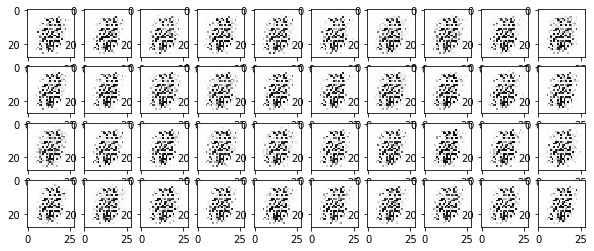

In [36]:
with tf.Session() as sess:
    
    #Run initializer first
    sess.run(init)
    
    #run training for the no of epochs defined
    for i in range (1, epochs+1):
        #mnist batches
        batch_x, _ = mnist.train.next_batch(training_batch_size)
        #Generate noise using random unniform generator
        z = np.random.uniform(-1., 1., size=[training_batch_size, noise_dimension])
        
        #training
        feed_dict = {disc_input: batch_x, gen_input: z}
        _, _, gl, dl =sess.run([train_gen, train_disc, gen_loss, disc_loss], feed_dict=feed_dict)
        
        if i%500 ==0 or i==1:
            print('Step %i: Generator loss: %f, Discriminator loss: %f' %(i,gl,dl))
    f, a = plt.subplots(4,10, figsize=(10,4))
    for i in range(10):
    #input noise
      z = np.random.uniform(-1., 1., size=[4, noise_dimension])
      g = sess.run([gen_sample], feed_dict={gen_input:z})
      g = np.reshape(g, newshape=(4,28,28,1))
      #reverse color
      g = -1*(g-1)
      for j in range(4):
        img = np.reshape(np.repeat(g[j][:,:,np.newaxis],3,axis=2), newshape=(28,28,3))
        a[j][i].imshow(img)
        
        
    f.show()
    plt.draw()
        

In [ ]:
#test the Model and generate images

In [ ]:
train = pd.DataFrame(mnist.train.images)
target = pd.DataFrame(mnist.train.labels)
test = pd.DataFrame(mnist.test.images)
testLabels = pd.DataFrame(mnist.test.labels)

In [ ]:
X_train = train.values.reshape(train.shape[0], 28, 28)
X_test = test.values.reshape(test.shape[0], 28, 28)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, target, test_size = 0.1, random_state=42)

In [ ]:
import numpy as np
X_trainrgb=np.repeat(X_train[...,np.newaxis], 3, -1)
X_trainrgb.shape